In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [4]:
model_type = 'PolyRegreg'
# model_type = 'NeuralNet'

In [5]:
lr = [1, .1, .01, .001]
model_params = {'model_type': model_type, 'norm': False, 'learning_rate':lr, 'epochs': 500, 'H': 100}

In [6]:
# metric_name = 'mmd_median_heuristic'
# metric_name = 'mmd'
metric_name = 'mmd_median_heuristic_unbiased'
n_clusters = None
bins = 10

In [7]:
# target = 1 # By defaul X->Y
# nb_samples = 400
# Nx = {
#     'name': 'uniform',
#     'var': 10
# }

# Ny = {
#     'name': 'normal',
#     'var': 40
# }
# f = lambda x: 2*np.tanh(x) + 2*np.sin(2*x) + x**3

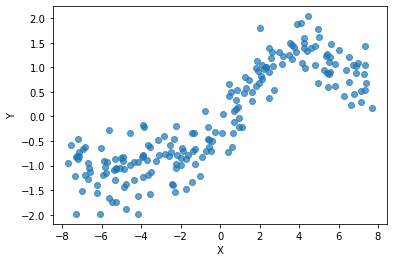

In [8]:
gps = synth_gen.GPsampler(gamma=10)
f = gps.get_func()
target = 1 # By defaul X->Y
nb_samples = 200

Nx = {
    'name': 'uniform',
    'var': 20
}

Ny = {
    'name': 'normal',
    'var': 0.4
}

binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y

viz.pretty_scatter(x, y, 'X', 'Y')

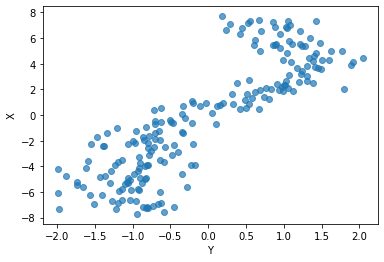

In [9]:
viz.pretty_scatter(y, x, 'Y', 'X')

In [10]:
X_, Y_, _ = intest.partition_data(x, y, n_clusters=n_clusters)

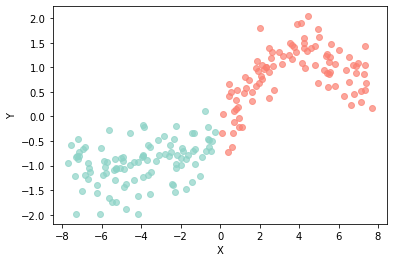

In [11]:
viz.plot_scatters(X_, Y_,'X', 'Y')

In [12]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y, n_clusters=n_clusters, model_params=model_params)
score, pairs = intest.find_max_discrp(residuals, metric_name=metric_name)

In [13]:
score

-0.008544492182310126

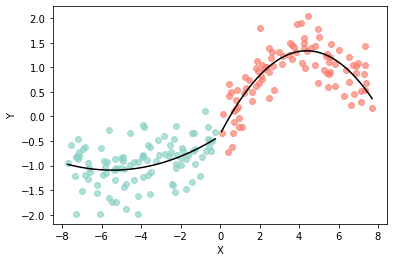

In [14]:
viz.plot_models(X_, Y_, models, x_label='X', y_label='Y')
plt.savefig('partition_smooth')

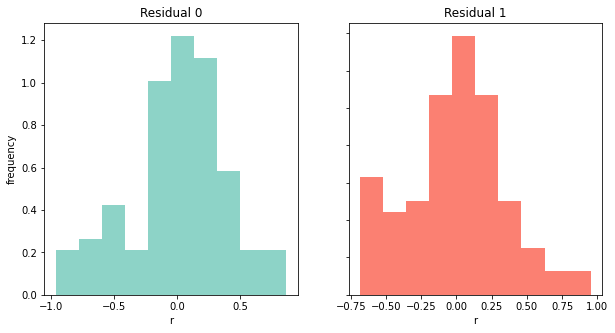

In [15]:
viz.plot_residuals(residuals, bins=bins)

In [16]:
X_r, Y_r, _ = intest.partition_data(y, x, n_clusters=n_clusters)

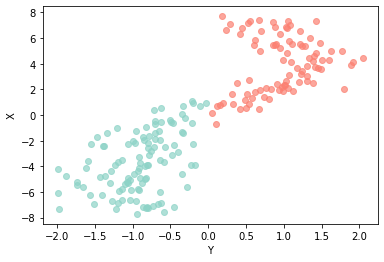

In [17]:
viz.plot_scatters(X_r, Y_r, 'Y', 'X')

In [18]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x, n_clusters=n_clusters, model_params=model_params)
scorer, pairsr = intest.find_max_discrp(residualsr, metric_name=metric_name)

In [19]:
scorer

0.016644034317555234

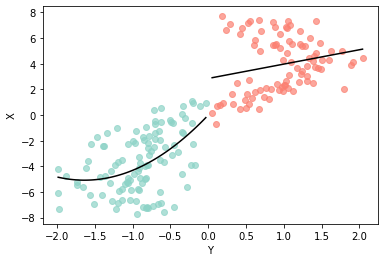

In [20]:
viz.plot_models(Y_r, X_r, modelsr, x_label='Y', y_label='X')

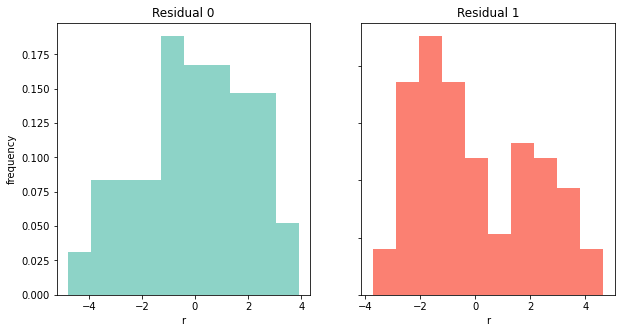

In [21]:
viz.plot_residuals(residualsr, bins=bins)

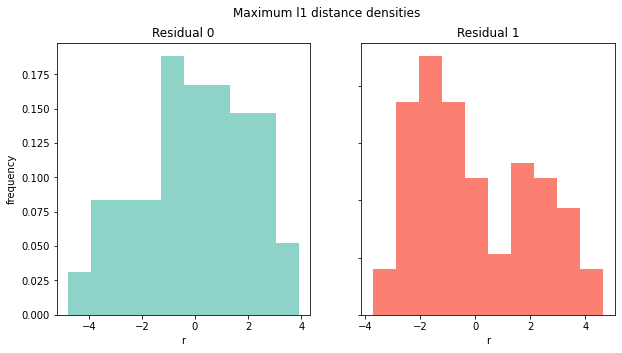

In [22]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities', bins=bins)

In [23]:
print('X -> Y', score)

X -> Y -0.008544492182310126


In [24]:
print('X <- Y', scorer)

X <- Y 0.016644034317555234


In [25]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [26]:
print('predicted:', int(score < scorer))

predicted: 1


In [27]:
print('Truth:', target)

Truth: 1
